In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
#Loading the data set into the jupyter notebook 
df1 = pd.read_csv(r"C:\Users\HP\Downloads\gold.dim_customers.csv") 
df2 = pd.read_csv(r"C:\Users\HP\Downloads\gold.dim_products.csv") 
df3= pd.read_csv(r"C:\Users\HP\Downloads\gold.fact_sales.csv") 

In [4]:
sales_customers = pd.merge(df3, df1, on="customer_key", how="left") 
# Join the result with products
final_df = pd.merge(sales_customers, df2, on="product_key", how="left")

In [5]:
final_df.head()

,order_number,product_key,customer_key,order_date,shipping_date,due_date,sales_amount,quantity,price,customer_id,...,product_id,product_number,product_name,category_id,category,subcategory,maintenance,cost,product_line,start_date
0,SO54496,282,5400,2013-03-16,2013-03-23,2013-03-28,25,1,25,16399,...,535,TI-M267,LL Mountain Tire,AC_TT,Accessories,Tires and Tubes,Yes,9,Mountain,2013-07-01
1,SO54496,289,5400,2013-03-16,2013-03-23,2013-03-28,5,1,5,16399,...,528,TT-M928,Mountain Tire Tube,AC_TT,Accessories,Tires and Tubes,Yes,2,Mountain,2013-07-01
2,SO54496,259,5400,2013-03-16,2013-03-23,2013-03-28,2,1,2,16399,...,480,PK-7098,Patch Kit/8 Patches,AC_TT,Accessories,Tires and Tubes,Yes,1,Other Sales,2013-07-01
3,SO54497,174,9281,2013-03-16,2013-03-23,2013-03-28,22,1,22,20280,...,485,FE-6654,Fender Set - Mountain,AC_FE,Accessories,Fenders,No,8,Mountain,2013-07-01
4,SO54497,280,9281,2013-03-16,2013-03-23,2013-03-28,9,1,9,20280,...,481,SO-R809-M,Racing Socks- M,CL_SO,Clothing,Socks,No,3,Road,2013-07-01


In [8]:
#To convert the numerical data into the categorical data
bins = [0,10000,30000,float('inf')] 
labels = ['Low','med','high'] 
final_df['Dataseg'] = pd.cut(final_df['sales_amount'],bins=bins,labels=labels,right=False)

In [9]:
final_df.columns.tolist()

['order_number',
 'product_key',
 'customer_key',
 'order_date',
 'shipping_date',
 'due_date',
 'sales_amount',
 'quantity',
 'price',
 'customer_id',
 'customer_number',
 'first_name',
 'last_name',
 'country',
 'marital_status',
 'gender',
 'birthdate',
 'create_date',
 'product_id',
 'product_number',
 'product_name',
 'category_id',
 'category',
 'subcategory',
 'maintenance',
 'cost',
 'product_line',
 'start_date',
 'Dataseg']

value count for category :


<Axes: xlabel='category'>

value count for subcategory :


<Axes: xlabel='subcategory'>

value count for country :


<Axes: xlabel='country'>

value count for gender :


<Axes: xlabel='gender'>

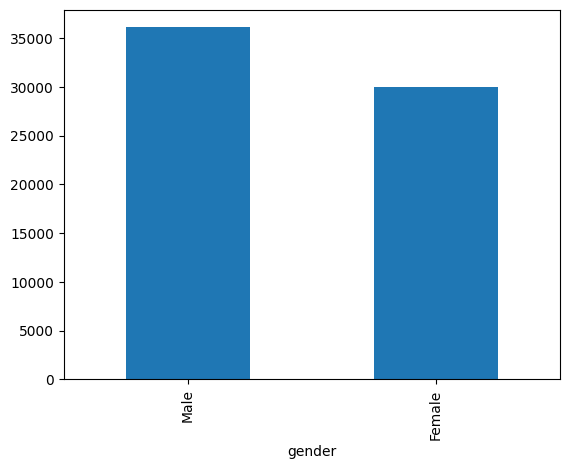

In [15]:
categorical_columns = final_df[['category','subcategory','country','gender']] 
for col in categorical_columns:
    print(f"value count for {col} :") 
    display(final_df[col].value_counts().plot(kind='bar')) 

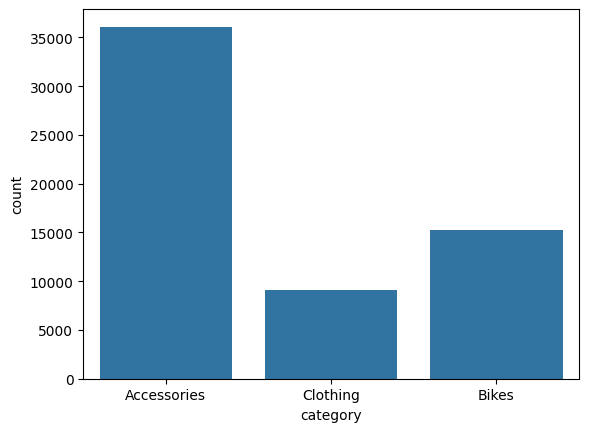

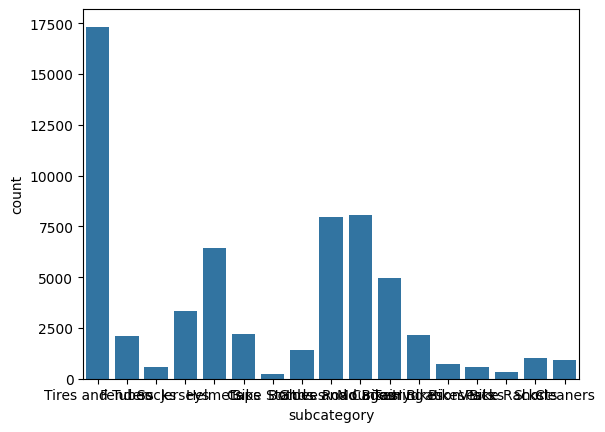

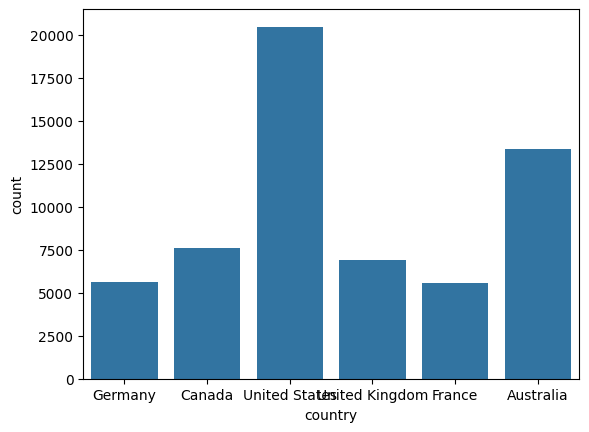

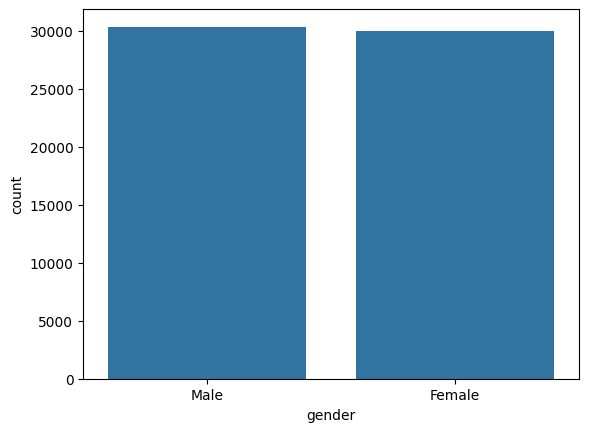

In [16]:
for i,predictor in enumerate(categorical_columns):
    plt.figure(i) 
    sns.countplot(data=final_df,x=predictor)

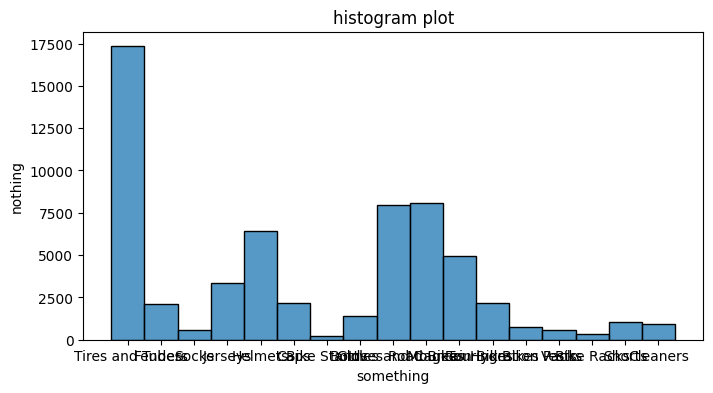

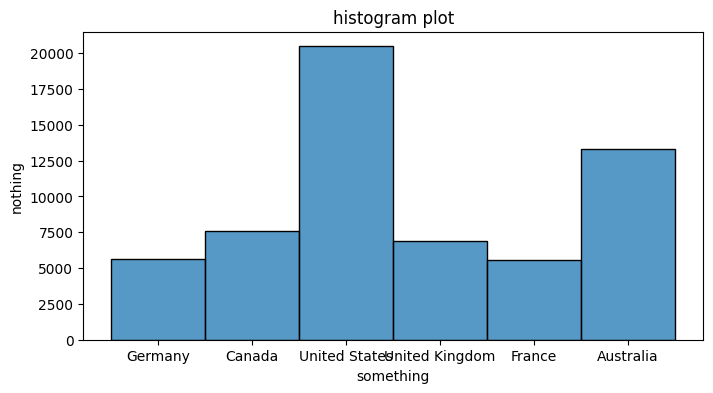

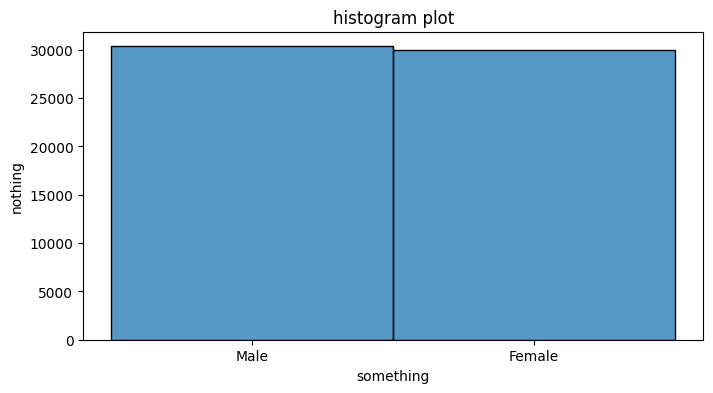

In [17]:
#Histplot of value counts for different occupation 
for col in categorical_columns:
    if col == 'category':
        continue 
    plt.figure(figsize=(8,4)) 
    sns.histplot(final_df[col]) 
    plt.title('histogram plot') 
    plt.xlabel('something') 
    plt.ylabel('nothing') 
    plt.show()

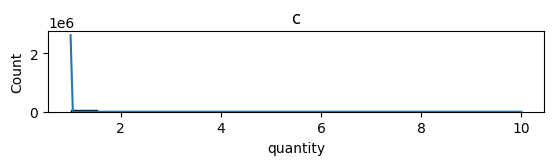

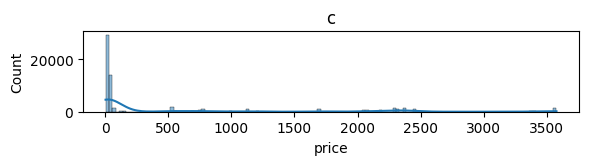

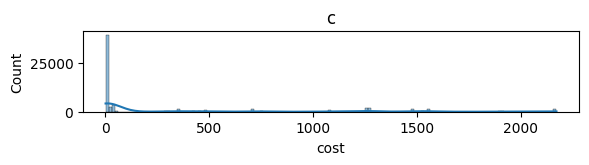

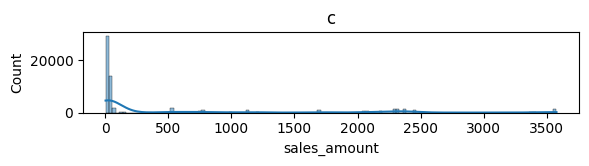

In [6]:
#Numerical analysis 
final_df.columns.tolist() 
numerical_analysis = final_df[['quantity','price','cost','sales_amount']] 
for i,col in enumerate(numerical_analysis):
    plt.subplot(4,1,i+1) 
    sns.histplot(final_df[col],kde=True) 
    plt.title('c') 
    plt.show()

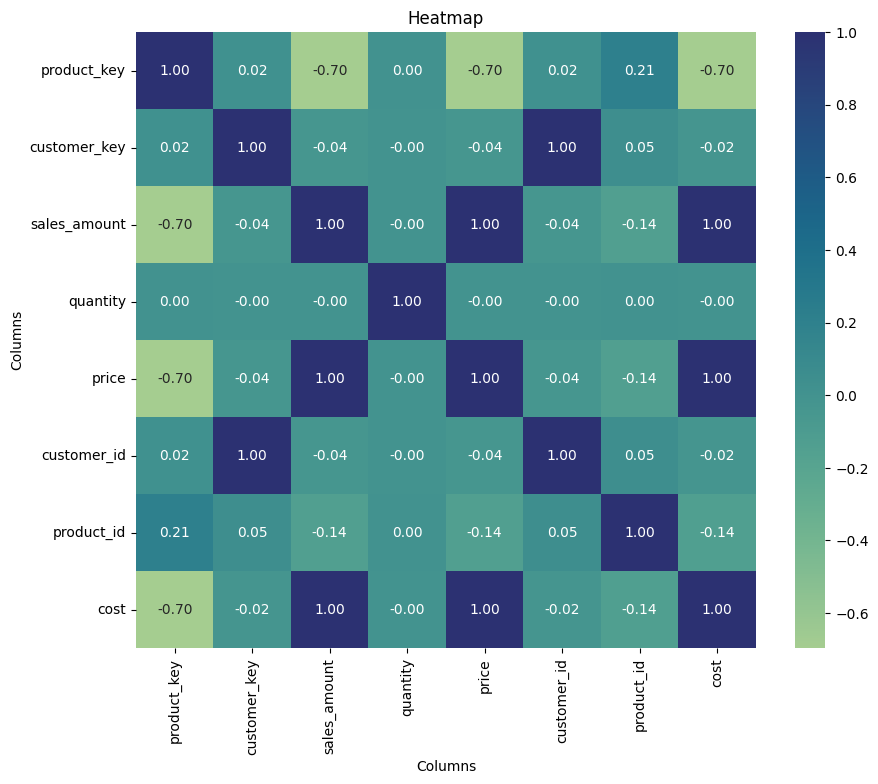

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# auto-select numeric columns if unsure
correlation_matrix = final_df.select_dtypes(include='number').corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt='.2f')
plt.title('Heatmap')
plt.xlabel('Columns')
plt.ylabel('Columns')
plt.show()
